In [2]:
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [3]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test  = to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
x_train[54, 12, 13, 1]

0.36862746

In [ ]:
# model with Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
    Dense(200, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])

In [5]:
# model with Functional API
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [7]:
# model complie
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
model.fit(x_train,
            y_train,
            batch_size=32,
            epochs=10,
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8439 - accuracy: 0.3329
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6678 - accuracy: 0.4045
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5849 - accuracy: 0.4328
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5315 - accuracy: 0.4535
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4952 - accuracy: 0.4709
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4629 - accuracy: 0.4810
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4390 - accuracy: 0.4868
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4128 - accuracy: 0.4993
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3934 - accuracy: 0.5059
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.367

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4185 - accuracy: 0.4987


[1.4184659719467163, 0.49869999289512634]

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

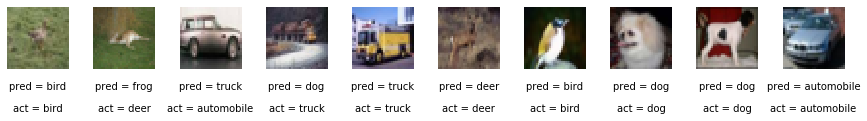

In [13]:
# plot
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show() 